Ecommerce purchase Intention prediction

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = '/content/online_shoppers_intention.csv'
df = pd.read_csv(file_path)

In [5]:
# Overview of dataset
print(" Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\n First 5 rows:")
display(df.head())

 Dataset loaded successfully!
Shape: (12330, 18)

 First 5 rows:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
# Check Data types and nulls
print("\n Data Types & Null Check:")
print(df.info())


 Data Types & Null Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  


In [8]:
# Statistical summary (numerical columns only)
print("\n Summary Statistics:")
display(df.describe())


 Summary Statistics:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [10]:
#  Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


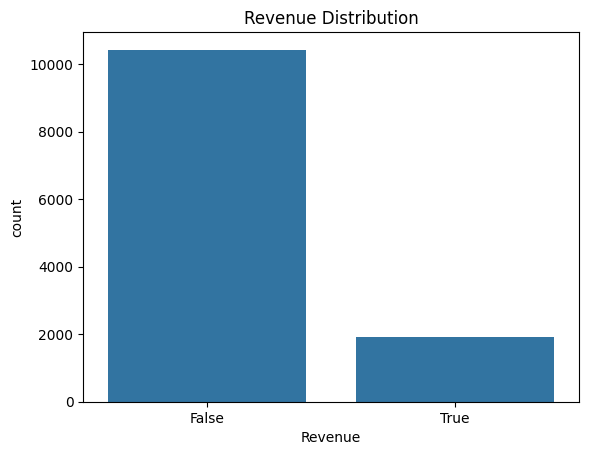

Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


In [11]:
# Target variable distribution
sns.countplot(x='Revenue', data=df)
plt.title('Revenue Distribution')
plt.show()
print(df['Revenue'].value_counts(normalize=True)*100)


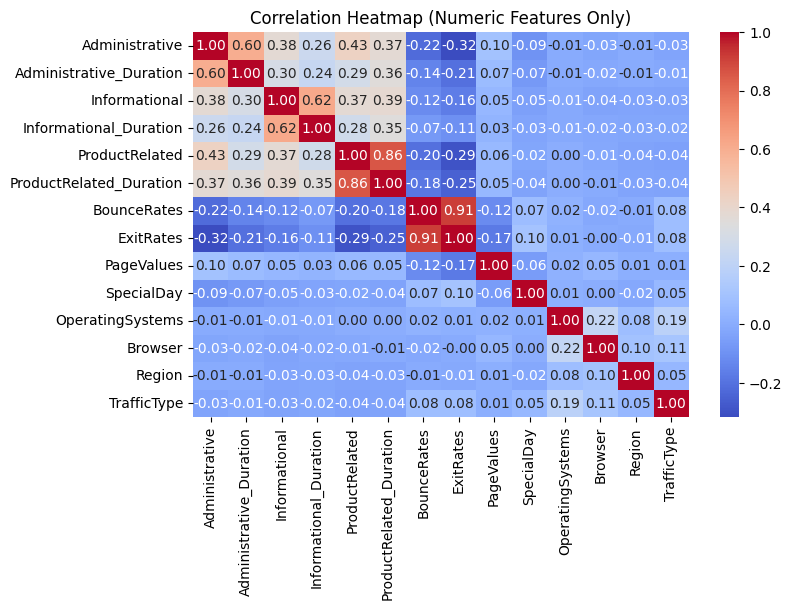

In [12]:
# heat map
import numpy as np

# numeric columns only
numeric_cols = df.select_dtypes(include=[np.number])

# Plot correlation heatmap of numeric features
plt.figure(figsize=(8,5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [13]:
# Convert Revenue to int
df['Revenue'] = df['Revenue'].astype(int)

# numeric columns again
numeric_cols = df.select_dtypes(include=[np.number])

# Correlation with target
corr_with_target = numeric_cols.corr()['Revenue'].sort_values(ascending=False)

print(corr_with_target)


Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


In [14]:
# data preparation smote process

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Create a copy to work on
data = df.copy()

# Convert 'Revenue' target column to numeric (if not already)
data['Revenue'] = data['Revenue'].astype(int)

# Encode categorical columns
label_cols = ['Month', 'VisitorType', 'Weekend']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save for decoding

# Separate features and target
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(" Data prepared successfully!")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


 Data prepared successfully!
Training set shape: (9864, 17)
Test set shape: (2466, 17)


 Logistic Regression Evaluation

 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.76      0.36      0.49       382

    accuracy                           0.88      2466
   macro avg       0.83      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466

 Confusion Matrix:
[[2042   42]
 [ 246  136]]
 ROC-AUC Score: 0.8652


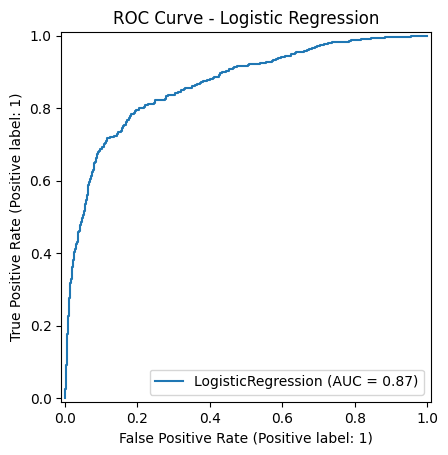

In [18]:
#data modelling

#model 1

# logical regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
print(" Logistic Regression Evaluation")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_lr))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
print(f" ROC-AUC Score: {roc_auc_lr:.4f}")

# ROC Curve
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()


 Decision Tree Evaluation

  Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2084
           1       0.53      0.55      0.54       382

    accuracy                           0.85      2466
   macro avg       0.72      0.73      0.72      2466
weighted avg       0.86      0.85      0.85      2466

 Confusion Matrix:
[[1894  190]
 [ 172  210]]
 ROC-AUC Score: 0.7293


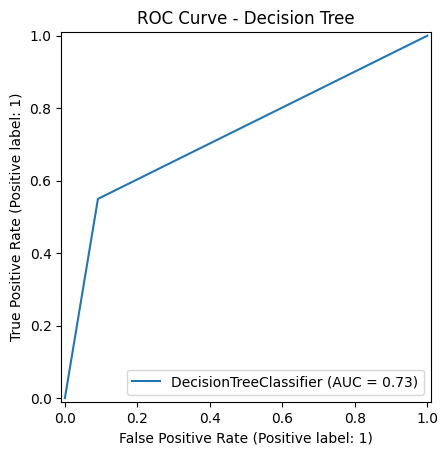

In [19]:
# model 2
#decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation
print(" Decision Tree Evaluation")
print("\n  Classification Report:")
print(classification_report(y_test, y_pred_dt))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
print(f" ROC-AUC Score: {roc_auc_dt:.4f}")

# ROC Curve
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("ROC Curve - Decision Tree")
plt.show()


 Random Forest Evaluation

 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.73      0.56      0.63       382

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466

🧾 Confusion Matrix:
[[2007   77]
 [ 169  213]]
 ROC-AUC Score: 0.9182


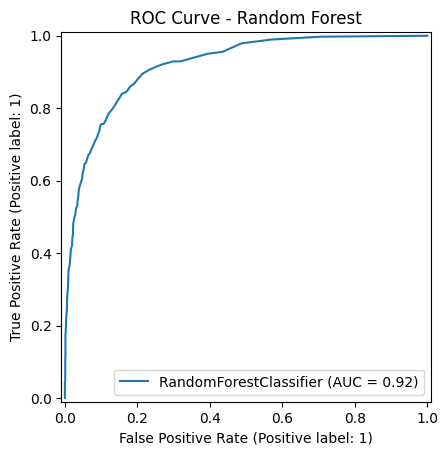

In [20]:
# model 3
# random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print(" Random Forest Evaluation")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f" ROC-AUC Score: {roc_auc_rf:.4f}")

# ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()


 MLP Classifier Evaluation

 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2084
           1       0.65      0.52      0.58       382

    accuracy                           0.88      2466
   macro avg       0.78      0.74      0.75      2466
weighted avg       0.87      0.88      0.88      2466

 Confusion Matrix:
[[1974  110]
 [ 182  200]]
 ROC-AUC Score: 0.8868


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


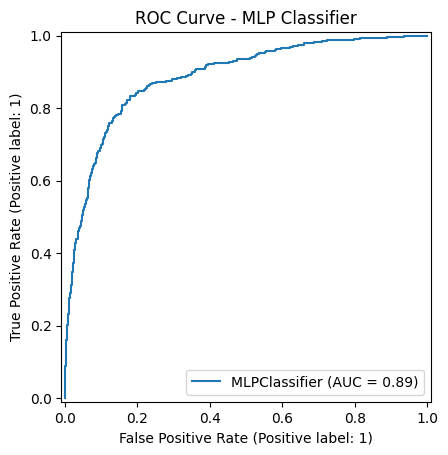

In [21]:
# model 4
# mlp multi layer precptron

from sklearn.neural_network import MLPClassifier

# Train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict on test set
y_pred_mlp = mlp_model.predict(X_test)
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Evaluation
print(" MLP Classifier Evaluation")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_mlp))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)
print(f" ROC-AUC Score: {roc_auc_mlp:.4f}")

# ROC Curve
RocCurveDisplay.from_estimator(mlp_model, X_test, y_test)
plt.title("ROC Curve - MLP Classifier")
plt.show()


 SVM Classifier Evaluation

 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2084
           1       0.71      0.43      0.53       382

    accuracy                           0.88      2466
   macro avg       0.80      0.70      0.73      2466
weighted avg       0.87      0.88      0.87      2466

 Confusion Matrix:
[[2016   68]
 [ 218  164]]
 ROC-AUC Score: 0.8520


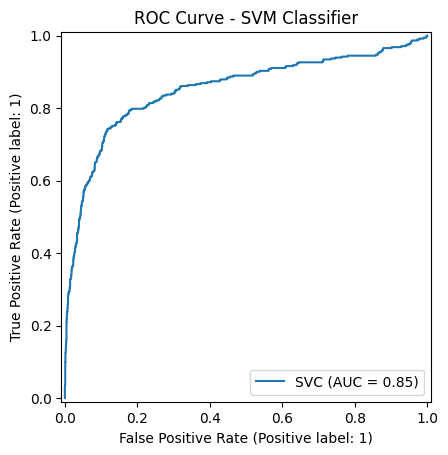

In [23]:
#Model 5
# model SVM Classifier Evaluation

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Train the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluation
print(" SVM Classifier Evaluation")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_svm))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print(f" ROC-AUC Score: {roc_auc_svm:.4f}")

# ROC Curve
RocCurveDisplay.from_estimator(svm_model, X_test, y_test)
plt.title("ROC Curve - SVM Classifier")
plt.show()


 XGBoost Classifier Evaluation

 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2084
           1       0.67      0.56      0.61       382

    accuracy                           0.89      2466
   macro avg       0.80      0.76      0.77      2466
weighted avg       0.88      0.89      0.89      2466

 Confusion Matrix:
[[1978  106]
 [ 167  215]]
 ROC-AUC Score: 0.9161


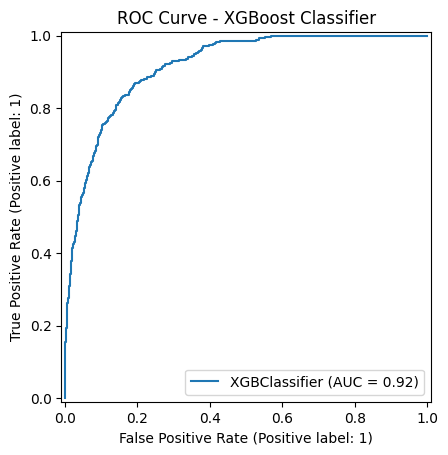

In [26]:
# Mode 6
# XGBoost Classifier Evaluation

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print(" XGBoost Classifier Evaluation")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f" ROC-AUC Score: {roc_auc_xgb:.4f}")

# ROC Curve
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("ROC Curve - XGBoost Classifier")
plt.show()


In [27]:
# comparision of all the six models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Define all 6 models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'MLP': MLPClassifier(max_iter=1000),
    'SVM': SVC(probability=True, random_state=42),  # SVM model with probability for ROC-AUC
    'XGBoost': xgb.XGBClassifier(random_state=42)  # XGBoost model
}

# Create a dictionary to store metrics
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'ROC-AUC': []
}

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predicted class labels
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred  # Probability for ROC-AUC

    # Append metrics to results dictionary
    results['Model'].append(name)
    results['Accuracy'].append(round(accuracy_score(y_test, y_pred), 4))
    results['Precision'].append(round(precision_score(y_test, y_pred), 4))
    results['Recall'].append(round(recall_score(y_test, y_pred), 4))
    results['F1-score'].append(round(f1_score(y_test, y_pred), 4))
    results['ROC-AUC'].append(round(roc_auc_score(y_test, y_prob), 4))

# Create DataFrame to display as table
comparison_df = pd.DataFrame(results)
print(comparison_df)


                 Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0  Logistic Regression    0.8832     0.7640  0.3560    0.4857   0.8652
1        Decision Tree    0.8520     0.5220  0.5288    0.5254   0.7200
2        Random Forest    0.9006     0.7246  0.5785    0.6434   0.9158
3                  MLP    0.8852     0.6533  0.5524    0.5986   0.8730
4                  SVM    0.8840     0.7069  0.4293    0.5342   0.8520
5              XGBoost    0.8893     0.6698  0.5628    0.6117   0.9161


                 Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0  Logistic Regression    0.8832     0.7640  0.3560    0.4857   0.8652
1        Decision Tree    0.8573     0.5391  0.5419    0.5405   0.7285
2        Random Forest    0.9011     0.7363  0.5628    0.6380   0.9152
3                  MLP    0.8820     0.6304  0.5759    0.6019   0.8690
4                  SVM    0.8840     0.7069  0.4293    0.5342   0.8520
5              XGBoost    0.8893     0.6698  0.5628    0.6117   0.9161


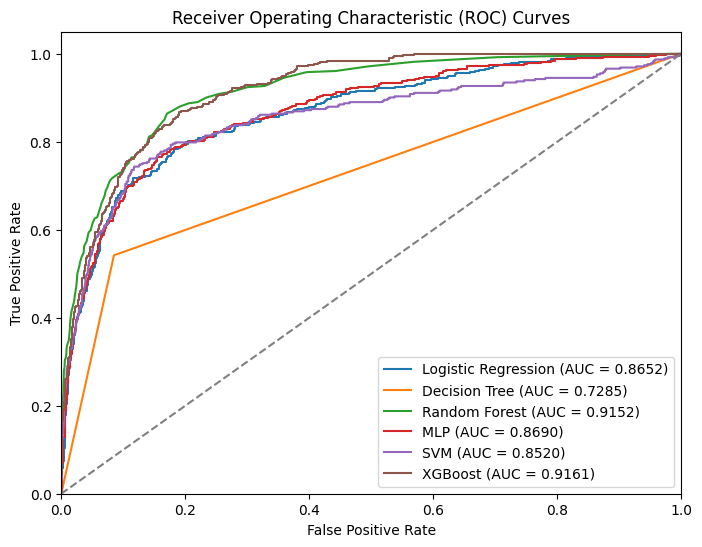

In [28]:
# comparision of roc curve of all six models

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd

# Define all 6 models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'MLP': MLPClassifier(max_iter=1000),
    'SVM': SVC(probability=True, random_state=42),  # SVM model with probability for ROC-AUC
    'XGBoost': xgb.XGBClassifier(random_state=42)  # XGBoost model
}

# Create a dictionary to store metrics
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'ROC-AUC': []
}

# Create a figure for ROC curves
plt.figure(figsize=(8, 6))

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predicted class labels
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred  # Probability for ROC-AUC

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.4f})')

    # Append metrics to results dictionary
    results['Model'].append(name)
    results['Accuracy'].append(round(accuracy_score(y_test, y_pred), 4))
    results['Precision'].append(round(precision_score(y_test, y_pred), 4))
    results['Recall'].append(round(recall_score(y_test, y_pred), 4))
    results['F1-score'].append(round(f1_score(y_test, y_pred), 4))
    results['ROC-AUC'].append(round(roc_auc_score(y_test, y_prob), 4))

# Create DataFrame to display as table
comparison_df = pd.DataFrame(results)
print(comparison_df)

# Final ROC curve adjustments
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
